In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

import tensorflow as tf

from sklearn.metrics import classification_report, confusion_matrix

ModuleNotFoundError: No module named 'seaborn'

In [2]:
dfs = []

for label in ['0', '1', '2', '3']:
    dfs.append(pd.read_csv('../input/emg-4/' + label + '.csv'))

In [1]:
for df in dfs:
    df.columns = list(range(len(df.columns)))

NameError: name 'dfs' is not defined

In [4]:
data = pd.concat([df for df in dfs], axis=0).reset_index(drop=True)

In [5]:
data

,0,1,2,3,4,5,6,7,8,9,...,55,56,57,58,59,60,61,62,63,64
0,-47.0,-6.0,-5.0,-7.0,13.0,-1.0,35.0,-10.0,10.0,-4.0,...,-25.0,47.0,6.0,6.0,5.0,13.0,21.0,111.0,15.0,0
1,-19.0,-8.0,-8.0,-8.0,-21.0,-6.0,-79.0,12.0,0.0,5.0,...,-83.0,7.0,7.0,1.0,-8.0,7.0,21.0,114.0,48.0,0
2,2.0,3.0,0.0,2.0,0.0,22.0,106.0,-14.0,-16.0,-2.0,...,-38.0,-11.0,4.0,7.0,11.0,33.0,39.0,119.0,43.0,0
3,6.0,0.0,0.0,-2.0,-14.0,10.0,-51.0,5.0,7.0,0.0,...,38.0,-35.0,-8.0,2.0,6.0,-13.0,-24.0,-112.0,-69.0,0
4,15.0,-5.0,-5.0,-15.0,12.0,-22.0,-38.0,36.0,9.0,6.0,...,-26.0,5.0,6.0,6.0,11.0,5.0,30.0,-48.0,25.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11669,-3.0,-1.0,-1.0,-1.0,-28.0,20.0,5.0,0.0,-5.0,0.0,...,-3.0,1.0,4.0,3.0,4.0,-51.0,-49.0,5.0,-9.0,3
11670,-13.0,-5.0,-4.0,-3.0,-4.0,-24.0,-10.0,-8.0,20.0,9.0,...,6.0,-3.0,-3.0,-3.0,-5.0,-4.0,-45.0,-12.0,-15.0,3
11671,-1.0,-3.0,-1.0,1.0,30.0,38.0,-1.0,36.0,-10.0,1.0,...,14.0,-8.0,-4.0,-4.0,-4.0,-21.0,-29.0,-5.0,0.0,3
11672,1.0,4.0,4.0,5.0,9.0,-10.0,4.0,1.0,-2.0,-1.0,...,-16.0,-3.0,0.0,-3.0,-5.0,-36.0,-90.0,3.0,5.0,3


In [6]:
print("Total missing values:", data.isna().sum().sum())

Total missing values: 0


# Splitting/Scaling

In [7]:
y = data[64].copy()
X = data.drop(64, axis=1).copy()

In [8]:
scaler = StandardScaler()

X = scaler.fit_transform(X)

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, random_state=100)

# Training

In [10]:
X_train.shape

(8171, 64)

In [11]:
inputs = tf.keras.Input(shape=(X.shape[1],))
x = tf.keras.layers.Dense(1024, activation='relu')(inputs)
x = tf.keras.layers.Dropout(0.2)(x)
x = tf.keras.layers.Dense(1024, activation='relu')(x)
x = tf.keras.layers.Dropout(0.2)(x)
outputs = tf.keras.layers.Dense(4, activation='softmax')(x)

model = tf.keras.Model(inputs, outputs)


model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

batch_size = 32
epochs = 50

history = model.fit(
    X_train,
    y_train,
    validation_split=0.2,
    batch_size=batch_size,
    epochs=epochs,
    callbacks=[
        tf.keras.callbacks.ReduceLROnPlateau()
    ]
)

Epoch 1/50
205/205 [==============================] - 3s 14ms/step - loss: 0.7109 - accuracy: 0.7222 - val_loss: 0.3590 - val_accuracy: 0.8832
Epoch 2/50
205/205 [==============================] - 3s 13ms/step - loss: 0.2863 - accuracy: 0.9030 - val_loss: 0.2575 - val_accuracy: 0.9174
Epoch 3/50
205/205 [==============================] - 2s 12ms/step - loss: 0.1814 - accuracy: 0.9376 - val_loss: 0.2808 - val_accuracy: 0.9070
Epoch 4/50
205/205 [==============================] - 2s 12ms/step - loss: 0.1400 - accuracy: 0.9535 - val_loss: 0.2816 - val_accuracy: 0.9193
Epoch 5/50
205/205 [==============================] - 2s 12ms/step - loss: 0.1067 - accuracy: 0.9633 - val_loss: 0.2778 - val_accuracy: 0.9217
Epoch 6/50
205/205 [==============================] - 3s 13ms/step - loss: 0.0734 - accuracy: 0.9757 - val_loss: 0.2812 - val_accuracy: 0.9260
Epoch 7/50
205/205 [==============================] - 3s 13ms/step - loss: 0.0616 - accuracy: 0.9812 - val_loss: 0.3098 - val_accuracy: 0.9223

# Results

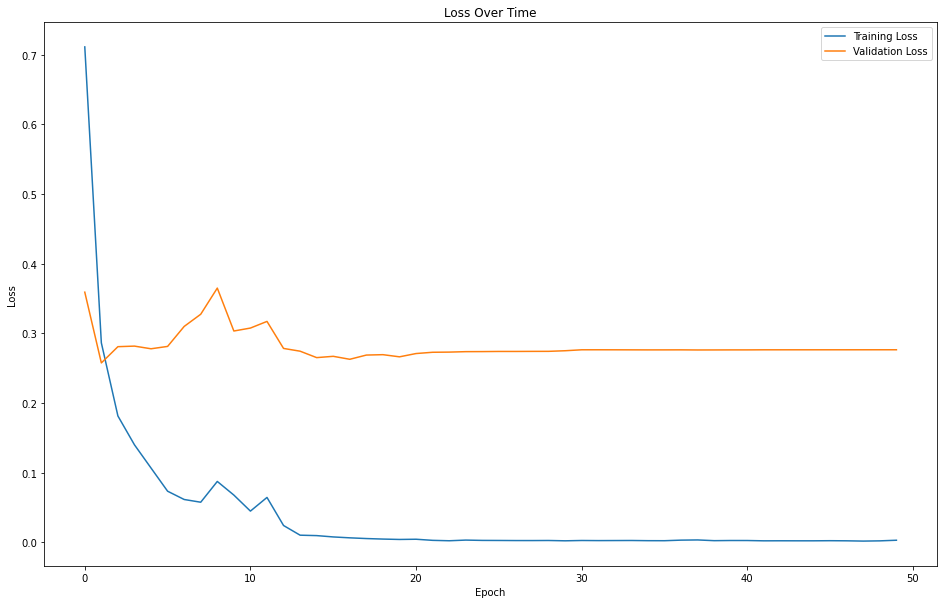

In [12]:
plt.figure(figsize=(16, 10))

plt.plot(range(epochs), history.history['loss'], label="Training Loss")
plt.plot(range(epochs), history.history['val_loss'], label="Validation Loss")

plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()
plt.title("Loss Over Time")

plt.show()

In [13]:
model.evaluate(X_test, y_test)

110/110 [==============================] - 0s 3ms/step - loss: 0.2059 - accuracy: 0.9560


[0.20591410994529724, 0.956037700176239]

In [14]:
y_true = np.array(y_test)
y_pred = np.array(list(map(lambda x: np.argmax(x), model.predict(X_test))))

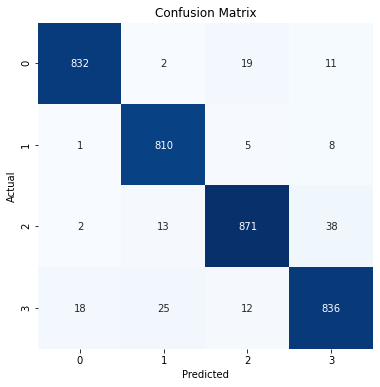

In [15]:
cm = confusion_matrix(y_true, y_pred)

plt.figure(figsize=(6, 6))
sns.heatmap(cm, annot=True, fmt='g', cmap='Blues', cbar=False)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

In [16]:
print(classification_report(y_true, y_pred))

              precision    recall  f1-score   support

           0       0.98      0.96      0.97       864
           1       0.95      0.98      0.97       824
           2       0.96      0.94      0.95       924
           3       0.94      0.94      0.94       891

    accuracy                           0.96      3503
   macro avg       0.96      0.96      0.96      3503
weighted avg       0.96      0.96      0.96      3503

